# This code is designed to compare the MS2 features of closely related analogues, with the following objectives:

- To identify unique features

- To calculate the ratio and abundance of each feature

The first input csv need to have a format like: 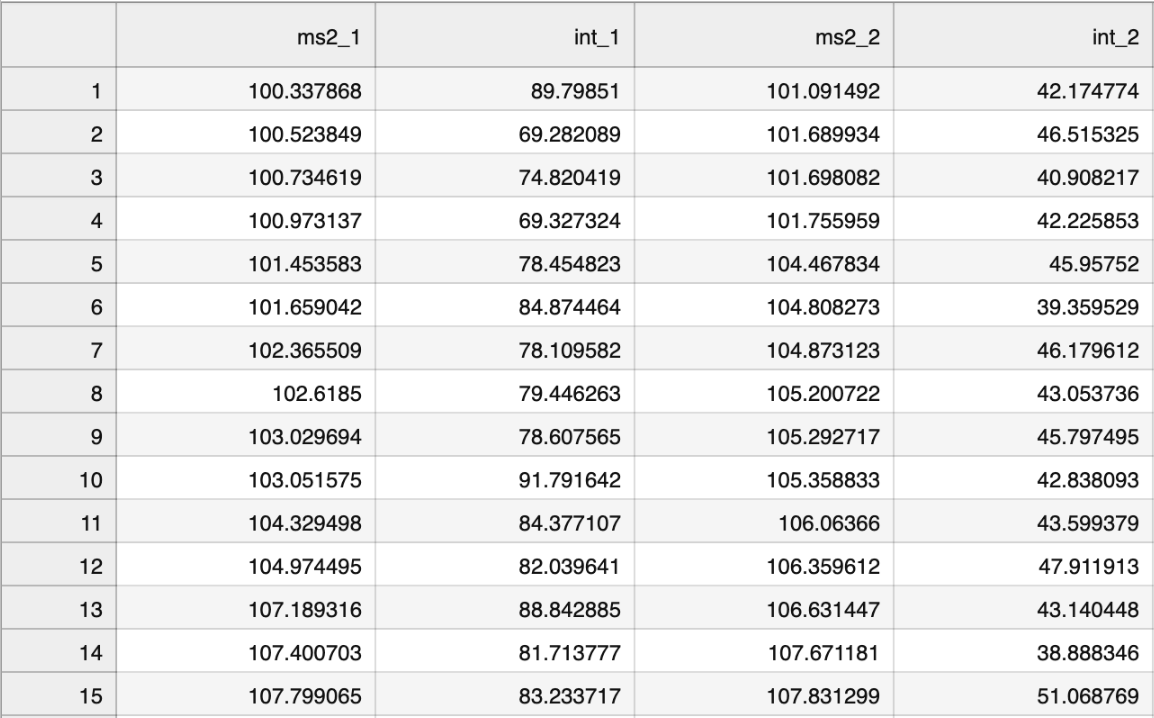

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = "841_raw.csv"  # The structure of the input need to be header: ms2_1; int_1; ms2_2; int_2
df = pd.read_csv(file_path)

#Normalzied section
scaler = MinMaxScaler()  

df_int1 = df[['ms2_1', 'int_1']].copy()
df_int1['int_1'] = scaler.fit_transform(df_int1[['int_1']])

df_int2 = df[['ms2_2', 'int_2']].copy()
df_int2['int_2'] = scaler.fit_transform(df_int2[['int_2']])

'''
Apply threshold: Remove values below 2% to eliminate noise (raw data only). 
If the data has already been preprocessed, this step can be skipped.
'''
threshold = 0.02
df_int1_filtered = df_int1[df_int1['int_1'] >= threshold]
df_int2_filtered = df_int2[df_int2['int_2'] >= threshold]


df_filtered = pd.concat([df_int1_filtered, df_int2_filtered], axis=1)

# Save your data
output_file = "filtered_normalized_data.csv"
df_filtered.to_csv(output_file, index=False)

You should get a updated CSV with the following result:
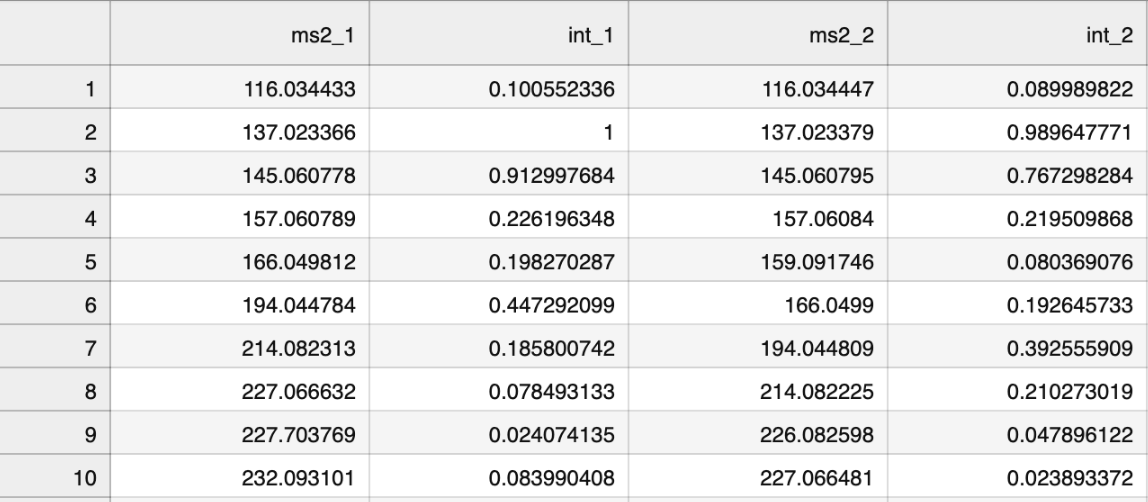

In [ ]:
# now let's plot the result 

import pandas as pd
import matplotlib.pyplot as plt

file_path = "filtered_normalized_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

ms2_1 = df["ms2_1"].values
int_1 = df["int_1"].values
ms2_2 = df["ms2_2"].values
int_2 = df["int_2"].values

# Define thresholds, change as desire 
match_threshold = 0.02  # If the difference between two peak values is less than 0.02, they are considered the same peak.
ratio_threshold_low = 0.97 # if the ratio of two peaks smaller than 0.97, then they will be marked into different colors
ratio_threshold_high = 1.2 # if the ratio of two peaks larger than 1.2, then they will be marked into different colors

# Change the color if desire
peak_data = []


color_mapping = {}

for i, m1 in enumerate(ms2_1):
    for j, m2 in enumerate(ms2_2):
        if abs(m1 - m2) <= match_threshold:
            ratio = int_2[j] / int_1[i]  
            
            if ratio < ratio_threshold_low or ratio > ratio_threshold_high:
                color = "orange"  # Intensity ratio out of range
            else:
                color = "green"  # Normal common peak
            
            color_mapping[(m1, m2)] = color
       
            peak_data.append([m1, int_1[i], m2, int_2[j], color])


plt.figure(figsize=(8, 6))

# Plot peaks for the top graph
for i in range(len(ms2_1)):
    has_match = False
    color = "b"  # Default: unique peaks are blue
    
    for j, m2 in enumerate(ms2_2):
        if abs(ms2_1[i] - m2) <= match_threshold:
            has_match = True
            color = color_mapping.get((ms2_1[i], m2), "green")  # Assign color based on intensity ratio
            break  # Stop checking once a match is found
    
    if not has_match:
        color = "b"  # Unique peak, default to blue
    
    plt.vlines(ms2_1[i], 0, int_1[i], colors=color, lw=2)
    peak_data.append([ms2_1[i], int_1[i], None, None, color])  # Save unmatched peaks

# Plot peaks for bottom graph
for j in range(len(ms2_2)):
    has_match = False
    color = "r"  # Default: unique peaks are red
    
    for i, m1 in enumerate(ms2_1):
        if abs(ms2_2[j] - m1) <= match_threshold:
            has_match = True
            color = color_mapping.get((m1, ms2_2[j]), "green")  # Assign color based on intensity ratio
            break  # Stop checking once a match is found

    if not has_match:
        color = "r"  # Unique peak, default to red
    
    plt.vlines(ms2_2[j], 0, -int_2[j], colors=color, lw=2)
    peak_data.append([None, None, ms2_2[j], int_2[j], color])  # Save unmatched peaks

# Labels and title
plt.axhline(0, color='black', linewidth=1)  
plt.xlabel("MS2 features")
plt.ylabel("Intensity")
plt.title("Mirror Image of xxxxx")# change the title as desire
plt.show()

# Save to CSV
output_df = pd.DataFrame(peak_data, columns=["ms2_1", "int_1", "ms2_2", "int_2", "color"])
output_csv_path = "classified_peaks.csv"
output_df.to_csv(output_csv_path, index=False)

print(f"Peak classification data saved to: {output_csv_path}") # you will know it finish once you see the line


The result should look like this:
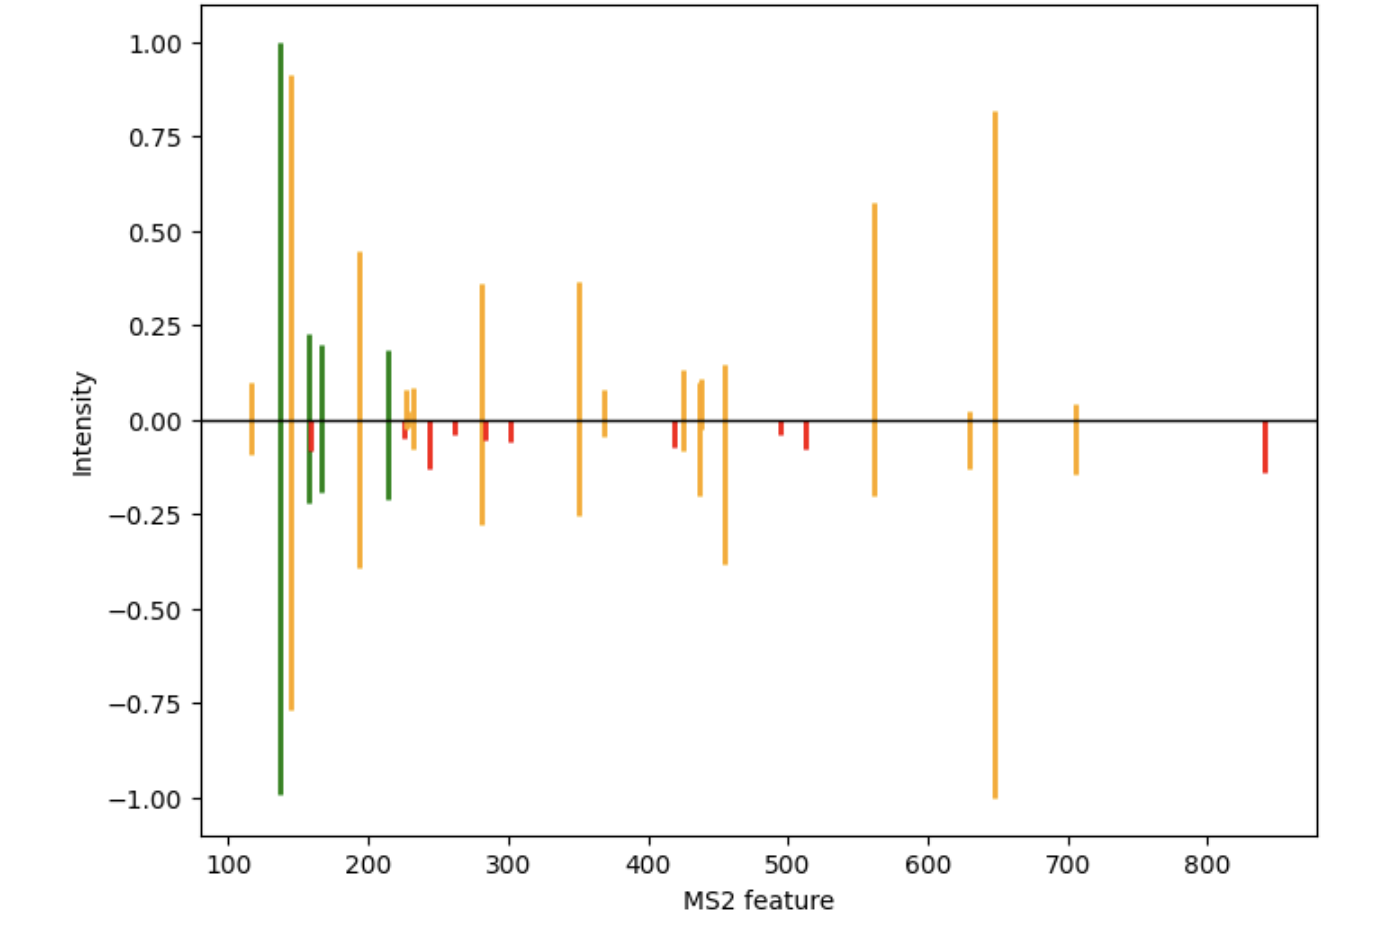
Green peaks represent common fragments with ratios close to 1:1. Red peaks indicate unique fragments found only in the bottom analogue. Orange peaks correspond to features with a ratio either less than 0.97 or greater than 1.2.
**The next step could involve examining the unique features to identify structural change points within the molecule, or analyzing MS2 features with large ratio variations to determine which fragments in which structural form is more stable for seeking more strcutural information.**